In [1]:
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('./computer_vision/fig/PD_MRI.jpeg')
print(img.shape)
if img is None:
    print('img read failed')
    sys.exit()
    
cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)

cv2.imshow('image', img)

while True:
    key = cv2.waitKey()
    
    if key == 27 or key == ord('q'):
        break

cv2.destroyAllWindows()    

(630, 630, 3)


In [2]:
import os

In [9]:
img_list = os.listdir('./computer_vision/fig/images1/')
# print(img_list)

img_path = []
for i in img_list:
    img_name = './computer_vision/fig/images1/'+ i
    img_path.append(img_name)
    
cv2.namedWindow('scene', cv2.WINDOW_NORMAL)

cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
    img = cv2.imread(img_path[idx])
    if img is None:
        print('image read failed')
        break
    cv2.imshow('scene', img)
    
    if cv2.waitKey(30) == 27:
        break
        
    idx += 1
    
    if idx >= len(img_path):
        idx = 0

cv2.destroyAllWindows()

In [12]:
src = cv2.imread('./computer_vision/fig/fig/cow.png')
dst = cv2.imread('./computer_vision/fig/fig/green.png')
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(src_gray, 244,255, cv2.THRESH_BINARY_INV)


h,w = mask.shape[:2]
crop = dst[300:300+h, 300:300+w]

cv2.copyTo(src,mask, crop)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask',mask)

while True:
    key = cv2.waitKey()
    if key == 27:
        break

cv2.destroyAllWindows()


In [3]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

# w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
# fourcc = cv2.VideoWriter_fourcc('*DIVX')    
    
    
    
while True:
    ret,frame = cap.read()
    if not ret:
        print('image read failed')
        break
    edge = cv2.Canny(frame,50,150)
#     edge = cv2.cvtColor(edge, cv2.COLOR_BAYER_BGR2GRAY)
    
    
#     out.write(edge)
    cv2.imshow('image', frame)
    cv2.imshow('edge', edge)
    
    if cv2.waitKey(30) == 27:
        break
  
# out.relase()
cap.release()
cv2.destroyAllWindows()

In [20]:
##Mouse Event
def call_mouse(event,x,y, flags, param):
    global oldx, oldy
    
    
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x,y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img,(oldx,oldy), (x,y), (0,0,0), 5,cv2.LINE_AA)
            cv2.imshow('img', img)
            oldx, oldy = x,y


img = np.ones((500,700,3), np.uint8)*255

cv2.namedWindow('img')

cv2.setMouseCallback('img', call_mouse, img)


cv2.imshow('img', img)


cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
def call_track(pos):
    img[:] = np.round(img1*(pos/255),1)
    
    cv2.imshow('image', img)
    
    
img = cv2.imread('./computer_vision/fig/fig/green.png', cv2.IMREAD_REDUCED_GRAYSCALE_2)

img1 = img.copy()

cv2.namedWindow('image')
cv2.createTrackbar('level', 'image', 0,255, call_track)

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [41]:
def call_track(pos):
    sunglass[:] = np.round(sunglass1*(pos/255),1)
    
    cv2.imshow('sung', sunglass)

sunglass_4D = cv2.imread('./computer_vision/fig/fig/imgbin_sunglasses_1.png',
                     cv2.IMREAD_UNCHANGED)

sunglass_4D = cv2.resize(sunglass_4D, (300,150))

sunglass = sunglass_4D[:,:,3]
print(sunglass.dtype)
sunglass1 = sunglass.copy()

cv2.namedWindow('sung')
cv2.createTrackbar('level', 'sung', 0,255, call_track)

cv2.imshow('sung', sunglass)

cv2.waitKey()
cv2.destroyAllWindows()

uint8
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
def call_track(pos):
    sunglass = sunglass1*pos
    
    cv2.imshow('sung', sunglass)



sunglass_4D = cv2.imread('./computer_vision/fig/fig/imgbin_sunglasses_1.png',
                     cv2.IMREAD_UNCHANGED)

sunglass_4D = cv2.resize(sunglass_4D, (300,150))

sunglass = sunglass_4D[:,:,-1]   ## 알파 채널 값 0,1 
print(sunglass)
sunglass[sunglass >0] = 1
sunglass1 = sunglass.copy()

cv2.namedWindow('sung')
cv2.createTrackbar('level', 'sung', 0,255, call_track)

cv2.imshow('sung', sunglass)

cv2.waitKey()
cv2.destroyAllWindows()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
## point processing

src = cv2.imread('./computer_vision/fig/fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)
print(type(src))

if src is None:
    print('image fead failed')
    sys.exit()
    
dst = np.clip(src +100.0, 0, 255).astype(np.uint8) # 소수점 연산 클리핑 후 uint로
dst1 = cv2.add(src,100)
print(dst.dtype)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst1', dst1)

cv2.waitKey()
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
uint8


In [53]:
src = cv2.imread('./computer_vision/fig/fig/lenna.bmp',1)


dst = cv2.add(src, (100,100,100, 0))
dst1 = np.clip(src +100.2 ,0 , 255).astype(np.uint8)


cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst1', dst1)

cv2.waitKey()
cv2.destroyAllWindows()

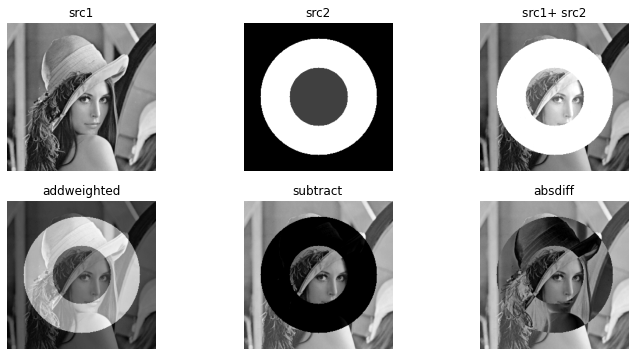

In [4]:
src1 = cv2.imread('./computer_vision/fig/fig/lenna256.bmp', 0)
src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2, (128,128), 100, 200, -1)
cv2.circle(src2, (128,128), 50, 50, -1)


dst1 = cv2.add(src1, src2)
# addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)


# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)
plt.figure(figsize = (12,6))
plt.subplot(231), plt.imshow(src1, cmap = 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap = 'gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1, cmap = 'gray'), plt.axis('off'), plt.title('src1+ src2')
plt.subplot(234), plt.imshow(dst2, cmap = 'gray'), plt.axis('off'), plt.title('addweighted')
plt.subplot(235), plt.imshow(dst3, cmap = 'gray'), plt.axis('off'), plt.title('subtract')
plt.subplot(236), plt.imshow(dst4, cmap = 'gray'), plt.axis('off'), plt.title('absdiff')
plt.show()




# cv2.waitKey()
# cv2.destroyAllWindows()

In [80]:
## addWeight
img1 = cv2.imread('./computer_vision/fig/fig/lenna256.bmp')
img2 = cv2.imread('./computer_vision/fig/fig/imgbin_hat.png', cv2.IMREAD_UNCHANGED)

img0 = img1.copy()

img2 = cv2.resize(img2, (150,150), interpolation = cv2.INTER_AREA)

hat = img2[:,:,0:3]
mask = img2[:,:,-1]

# print(img2.shape)

crop = img1[60:210, 80:230]


cv2.copyTo(hat, mask, crop)


for i in range(101):
    alpha = i*0.01
    dst = cv2.addWeighted(img1, alpha, img0, 1-alpha, 0.0)
    cv2.imshow('dst', dst)
    
    if cv2.waitKey(50) == 27:
        break
        
    if i == 100:
        cv2.waitKey()


# cv2.imshow('img0', img0)
# cv2.imshow('img1', img1)
# # cv2.imshow('crop', crop)

# cv2.waitKey()
cv2.destroyAllWindows()

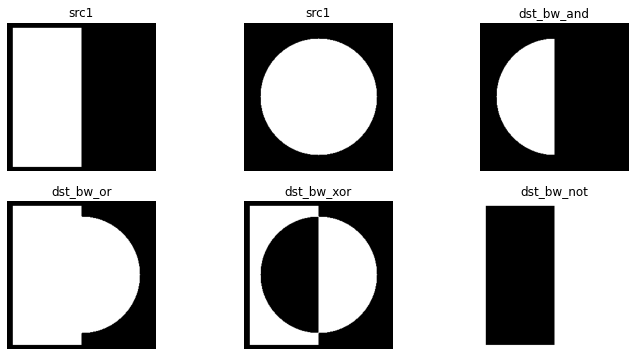

In [87]:
## bitwise operation
src1 = np.zeros((256,256), np.uint8)
cv2.rectangle(src1, (10,10), (127,248), 255, -1)

src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2, (128,128), 100, 255, -1)

dst_bw_and = cv2.bitwise_and(src1,src2) #둘다 1
dst_bw_or = cv2.bitwise_or(src1,src2)  #
dst_bw_xor = cv2.bitwise_xor(src1,src2)
dst_bw_not = cv2.bitwise_not(src1)


# cv2.imshow('src1',src1)
# cv2.imshow('src2',src2)
# cv2.imshow('bw_and', dst_bw_and)

plt.figure(figsize = (12,6))
plt.subplot(231), plt.imshow(src1, 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(233), plt.imshow(dst_bw_and, 'gray'), plt.axis('off'), plt.title('dst_bw_and')
plt.subplot(234), plt.imshow(dst_bw_or, 'gray'), plt.axis('off'), plt.title('dst_bw_or')
plt.subplot(235), plt.imshow(dst_bw_xor, 'gray'), plt.axis('off'), plt.title('dst_bw_xor')
plt.subplot(236), plt.imshow(dst_bw_not, 'gray'), plt.axis('off'), plt.title('dst_bw_not')

cv2.waitKey()

cv2.destroyAllWindows()




In [4]:
src = cv2.imread('./computer_vision/fig/fig/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
print(src.shape)

b,g,r = cv2.split(src)

# h,s,v = cv2.split(src_hsv) ## hh,ss,vv 아래와 같음
hh = src_hsv[:,:,0]
ss = src_hsv[:,:,1]
vv = src_hsv[:,:,2]


dst = cv2.merge((hh,ss,vv))
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)

cv2.imshow('BGR', src)
# cv2.imshow('b', b)
# cv2.imshow('g', g)
# cv2.imshow('r', r)
# cv2.imshow('h', h)
# cv2.imshow('s', s)
# cv2.imshow('v', v)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

(367, 550, 3)


<class 'numpy.ndarray'> (256, 1)


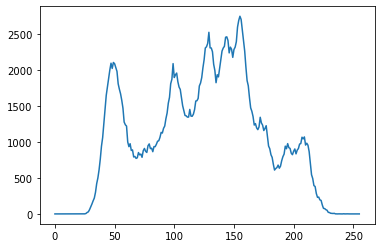

In [27]:
src = cv2.imread('./computer_vision/fig/fig/lenna.bmp',0)

# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist

hist = cv2.calcHist([src], [0], None, [256], [0,256])
print(type(hist), hist.shape)

cv2.imshow('src', src)

plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

uint8
<class 'numpy.ndarray'> (256, 1)


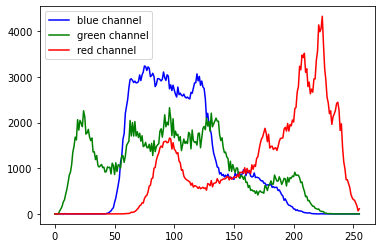

In [20]:
src = cv2.imread('./computer_vision/fig/fig/lenna.bmp',1)
print(src.dtype)
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
# images: 입력영상 리스트(리스트로 입력)
# channels: 채널리스트, 3 채널의 경우 [0,1,2]
# mask: 마스크 영상입력, 영상전체는 None으로 지정
# histSize: 히스터그램 빈의 크기
# range: 히스토그램의 최솟값과 최댓값
# hist: 계산된 히스토그램, numpy.ndarray 타입
# accumulate: 기존의 히스토그램을 누적할경우 True

#accumulate : 기존의 히스토그램을 누적할 경우 True
hist_b = cv2.calcHist([src], [0], None, [256], [0,256])
hist_g = cv2.calcHist([src], [1], None, [256], [0,256])
hist_r = cv2.calcHist([src], [2], None, [256], [0,256])
print(type(hist), hist.shape)

cv2.imshow('src', src)

plt.plot(hist_b, c = 'b', label = 'blue channel')
plt.plot(hist_g, c = 'g', label = 'green channel')
plt.plot(hist_r, c = 'r', label = 'red channel')
plt.legend()
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

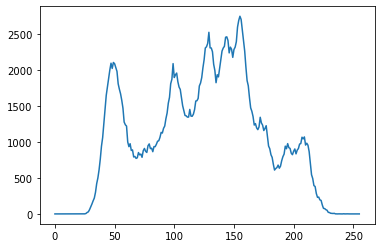

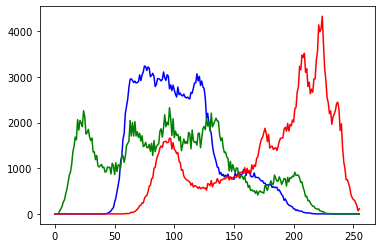

In [18]:
# 그레이스케일 영상의 히스토그램
src = cv2.imread('./computer_vision/fig/fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) 
hist = cv2.calcHist([src], [0], None, [256], [0, 256])

cv2.imshow('src', src)
cv2.waitKey()

cv2.destroyAllWindows()

plt.plot(hist)
plt.show()

# 컬러 영상의 히스토그램
src = cv2.imread('./computer_vision/fig/fig/lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()


# b, g, r = cv2.split(src)

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])

plt.plot(hist_b, color = "b")
plt.plot(hist_g, color = "g")
plt.plot(hist_r, color = "r")
plt.show()


# colors = ['b', 'g', 'r']
# bgr_planes = cv2.split(src)
# print(src)
# print(bgr_planes)


# for (p, c) in zip(bgr_planes, colors):
#     hist = cv2.calcHist([p], [0], None, [256], [0, 256])
#     plt.plot(hist, color=c)

# cv2.imshow('src', src)
# cv2.waitKey()

# plt.show()

# cv2.destroyAllWindows()

In [23]:
def getGrayHistImage(hist):
    imgHist = np.full((200,256), 255, np.uint8)
    
    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x,200)
        pt2 = (x,200 - int(hist[x,0]*200/histMax))
        cv2.line(imgHist, pt1, pt2, 0)
        
    return imgHist

src = cv2.imread('./computer_vision/fig/fig/lenna.bmp',0)

hist = cv2.calcHist([src], [0], None, [256], [0,256])
histImg = getGrayHistImage(hist)

cv2.imshow('src',src)
cv2.imshow('hist', histImg)


cv2.waitKey()
cv2.destroyAllWindows()